<h1>Exploratory Data Analysis</h1>

<p>Over this notebook, it is going to be analized the synthetic data generated with the java application.</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import typing
import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.size'] = 10

color1 = "#ffee00"  # Amarillo 
color2 = "#030300"  # Negro casi absoluto 

In [2]:
gen = typing.TypeVar("gen")

def get_index(data: pd.DataFrame, column: str, value: gen) -> int:
    """
    Method to find the first value in the column dataframe and return it index reference.

    Args:
        data (pd.DataFrame): Complete dataframe to search for information.
        column (str):  Column selected ato search for defined value.
        value (gen): The first data in the dataframe with this value. The value has to be identical with the one in the Dataframe.

    Returns:
        int: Get the index of the first value.

    Exceptions:
        IndexError: If the value does not exist, return None.
    """
    try:
        i = data[data[column] == value].index[0]
        return i
    except IndexError:
        return None
    

def atipic_data(data: pd.DataFrame, column: str) -> list[float, int]:
    """
    Method to count the atipic data in a column of the Dataframe.

    Args:
        data (pd.Dataframe): Complete dataframe to search for information.
        column (str): Column selected to search for atipic data.

    Returns:
        list[float, int]: Get the percentage expressed in parts per unit and the number of atipic data found.
    """
    upper_quartile = np.percentile(data[column], 75)
    lower_quartile = np.percentile(data[column], 25)

    iqr = (upper_quartile - lower_quartile) * 1.5

    atipic = 0
    for item in data[column]:
        if item > (upper_quartile + iqr):
            atipic += 1
            continue
        if item < (lower_quartile - iqr):
            atipic += 1
    
    percentage = atipic / data[column].count()
    
    return percentage, atipic


def hist_plot(data: pd.DataFrame, columns: tuple[str, ...]) -> list[mpl.axes._axes.Axes]:
    size = len(columns)
    fig = plt.figure(figsize=(12, 6))
    axes = np.zeros((size, 1), dtype=object)
    histograms = list()
    
    try:
        i = 0
        for column in columns:
            axes[i, 0] = plt.subplot(size, 1, i + 1)
            axes[i, 0].set(ylabel=column)
            hist_aux = sns.histplot(data=data, kde=True, x=column, ax=axes[i, 0], color=color1, stat='density')
            sns.kdeplot(data=data,x=column, color=color2 )
            histograms.append(hist_aux)
            i += 1
        # Adjust layout of the plots
        plt.tight_layout()  
        plt.show()
        return histograms
    except IndexError:
        return histograms
    
    
def hist_plot_specific(data: pd.DataFrame, column: str, binwidth: float = 0.5) -> mpl.axes._axes.Axes:
    fig = plt.figure(figsize=(12, 12))
    axes = np.zeros((1, 1), dtype=object)
    
    try:
        axes[0, 0] = plt.subplot(1, 1, 1)
        axes[0, 0].set(ylabel=column)
        histogram = sns.histplot(data=data, kde=True, x=column, binwidth=binwidth, ax=axes[0, 0], color=color1, stat='density')
        sns.kdeplot(data=data, x=column, color=color2)
        #plt.tight_layout()  # Adjust layout of the plots
        #plt.show()
        return histogram
    except IndexError:
        return histogram 
    

def box_plot(data: pd.DataFrame, columns: tuple[str, ...]) -> list[mpl.axes._axes.Axes]:
    size = int(len(columns) / 2 + len(columns) % 2)
    fig = plt.figure(figsize=(12, 6))
    axes = np.zeros((size, 2), dtype=object)
    boxs = list()
    
    try:
        i = 0
        j = 0
        k = 0
        for column in columns:
            axes[i, j] = plt.subplot(size, 2, k + 1)
            axes[i, j].set(ylabel=column)
            box_aux = sns.boxplot(data=data, x=column, ax=axes[i, j], color=color1)
            boxs.append(box_aux)
            if j == 0:
                j = 1
            else:
                j = 0
            i += j
            k += 1
        return boxs
    except IndexError:
        return boxs
    
    
def df_correlations(data: pd.DataFrame, method: str = 'pearson') -> bool:
    try:
        correlations = data.corr(method='pearson')
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title(f'Correlaciones de {method} entre las variables')
        plt.show()
    except Exception as e:
        print(f"Unexpected error occurred: {e}")
        return False
    return True


In [3]:
current_dir = os.getcwd()
print("Current Directory:", current_dir)

file_path = os.path.abspath(os.path.join(current_dir, "../../..", 'Sample_Data', 'For_Modeling', 'datosMarcacionesES_1733999425626_1.csv'))
print("Generated File Path:", file_path)

# Check if the file exists
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found.")

Current Directory: c:\Users\34673\Desktop\Repos\GithubProject\SignalDetection\Code\Data_Acquisition_and_Understanding\eda
Generated File Path: c:\Users\34673\Desktop\Repos\GithubProject\SignalDetection\Sample_Data\For_Modeling\datosMarcacionesES_1733999425626_1.csv
File found!


In [4]:
df = pd.read_csv(filepath_or_buffer=file_path, sep=',', header=None, decimal=',')
df.columns = ['receiver', 'time', 'latitude', 'longitude', 'angleNorth', 'dbsignal', 'wrong', 'no_measure', 'current_lat', 'current_long']
df.head(10)

,receiver,time,latitude,longitude,angleNorth,dbsignal,wrong,no_measure,current_lat,current_long
0,0,0.008431669978122646,40.74674867699393,0.7601086262883093,56.943694026834685,-61.9983539726081,False,False,40.85197664250851,0.9633670241249316
1,1,-0.022946471151934933,40.77987236992601,0.41727997309875653,80.70396257057335,-69.04427808721294,False,False,40.85197664250851,0.9633670241249316
2,2,-0.04775138071935712,40.78035756616551,0.09786151447158715,82.16896565216685,-72.96577552391521,False,False,40.85197664250851,0.9633670241249316
3,0,0.5429875554927929,40.74674867699393,0.7601086262883093,54.53461642387512,-61.9983539726081,False,False,40.85197664250851,0.9633670241249316
4,1,0.49152309759471424,40.77987236992601,0.41727997309875653,78.80983632327295,-69.04427808721294,False,True,40.85197664250851,0.9633670241249316
5,2,0.4707265282784752,40.78035756616551,0.09786151447158715,83.16077862570388,-72.96577552391521,False,False,40.85197664250851,0.9633670241249316
6,0,0.9984095016424488,40.74674867699393,0.7601086262883093,55.219079378876,-61.9983539726081,False,False,40.85197664250851,0.9633670241249316
7,1,1.0446760432737732,40.77987236992601,0.41727997309875653,80.58938117757823,-69.04427808721294,False,False,40.85197664250851,0.9633670241249316
8,2,1.0043807234728555,40.78035756616551,0.09786151447158715,84.4311686460713,-72.96577552391521,False,False,40.85197664250851,0.9633670241249316
9,0,1.4706991848195166,40.74674867699393,0.7601086262883093,54.84269340588374,-61.9983539726081,False,False,40.85197664250851,0.9633670241249316


In [5]:
df.isnull().sum()

receiver        0
time            0
latitude        0
longitude       0
angleNorth      0
dbsignal        0
wrong           0
no_measure      0
current_lat     0
current_long    0
dtype: int64

In [6]:
print(df.shape)
df.info()

(15813, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15813 entries, 0 to 15812
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   receiver      15813 non-null  int64 
 1   time          15813 non-null  object
 2   latitude      15813 non-null  object
 3   longitude     15813 non-null  object
 4   angleNorth    15813 non-null  object
 5   dbsignal      15813 non-null  object
 6   wrong         15813 non-null  bool  
 7   no_measure    15813 non-null  bool  
 8   current_lat   15813 non-null  object
 9   current_long  15813 non-null  object
dtypes: bool(2), int64(1), object(7)
memory usage: 1019.3+ KB


In [7]:
df['time'] = df['time'].astype('float64')
df['latitude'] = df['latitude'].astype('float64')
df['longitude'] = df['longitude'].astype('float64')
df['angleNorth'] = df['angleNorth'].astype('float64')
df['dbsignal'] = df['dbsignal'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15813 entries, 0 to 15812
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   receiver      15813 non-null  int64  
 1   time          15813 non-null  float64
 2   latitude      15813 non-null  float64
 3   longitude     15813 non-null  float64
 4   angleNorth    15813 non-null  float64
 5   dbsignal      15813 non-null  float64
 6   wrong         15813 non-null  bool   
 7   no_measure    15813 non-null  bool   
 8   current_lat   15813 non-null  object 
 9   current_long  15813 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 1019.3+ KB


In [8]:
df['angleNorth'].describe()
# print(math.pi)  

count    15813.000000
mean       124.085324
std        128.856472
min          0.299482
25%         32.984426
50%         65.040109
75%        248.305545
max        359.475148
Name: angleNorth, dtype: float64

In [9]:
df_p = df.copy()
for angle in df['angleNorth']:
    if angle > 180:
        df_p.loc[get_index(df_p, 'angleNorth', angle), 'angleNorth'] = angle - 360

for angle in df_p['angleNorth']:
    df_p.loc[get_index(df_p, 'angleNorth', angle), 'angleNorth'] = angle * math.pi / 180

In [10]:
df_p['angleNorth'].describe()

count    15813.000000
mean         0.486923
std          0.819227
min         -3.135763
25%         -0.206221
50%          0.565535
75%          1.122207
max          3.136258
Name: angleNorth, dtype: float64

In [11]:
percentage, total = atipic_data(data=df, column='angleNorth')
print(percentage)
print(total)

percentage, total = atipic_data(data=df_p, column='angleNorth')
print(percentage)
print(total)

df['wrong'].value_counts()

0.0
0
0.013722886232846392
217


wrong
False    14307
True      1506
Name: count, dtype: int64

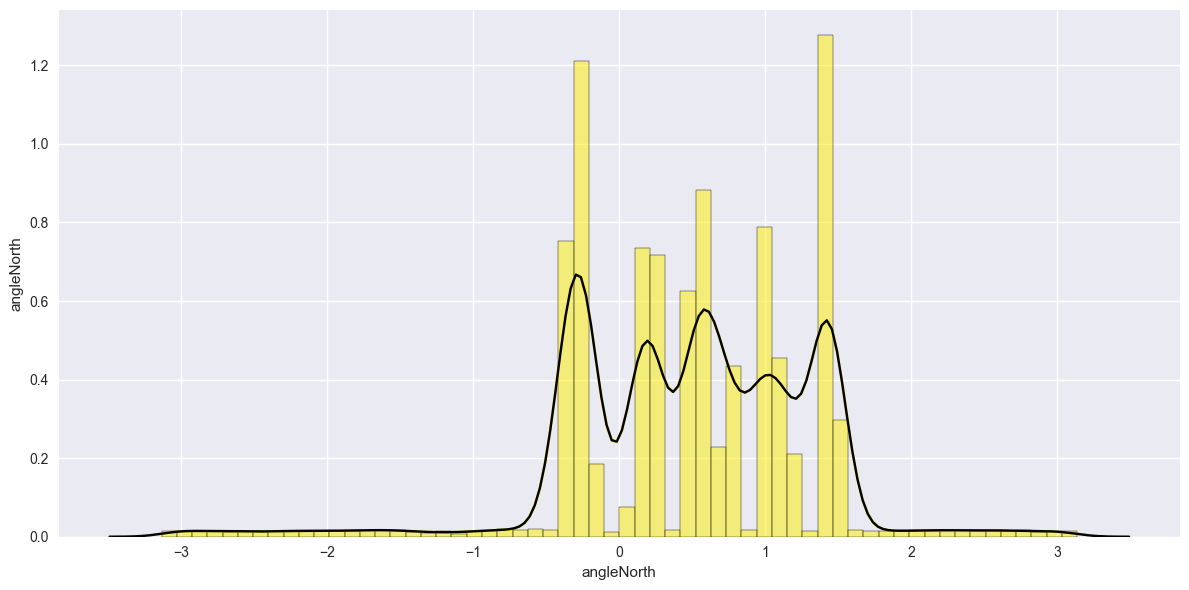

[<Axes: xlabel='angleNorth', ylabel='angleNorth'>]

In [12]:
hist_plot(data=df_p, columns=['angleNorth'])

<Axes: xlabel='angleNorth', ylabel='angleNorth'>

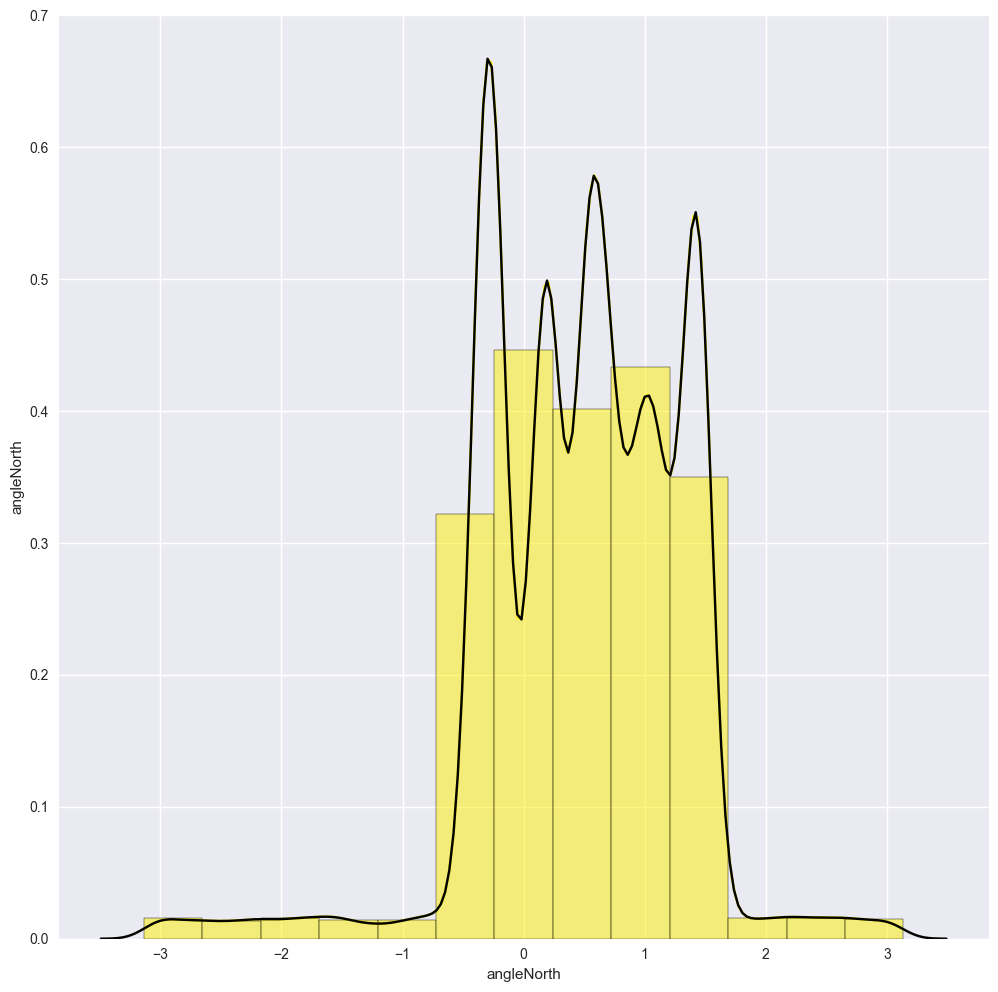

In [13]:
hist_plot_specific(data=df_p, column='angleNorth', binwidth=0.5)

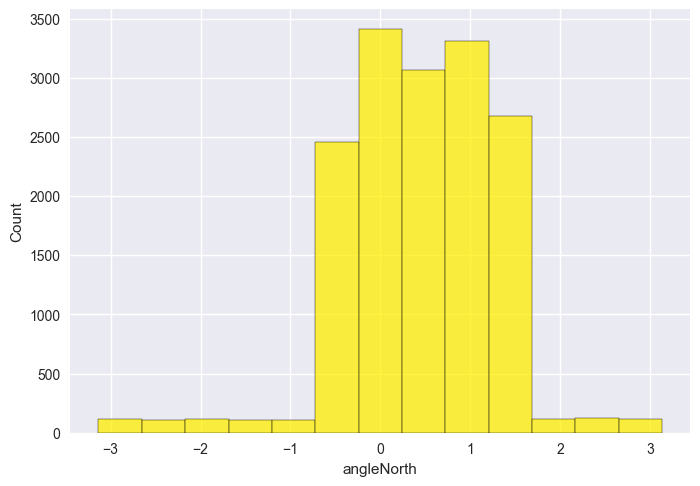

In [14]:
histogram = sns.histplot(data=df_p, kde=False, x=df_p['angleNorth'], binwidth=0.5, color=color1)  # ax=axes[0, 0]

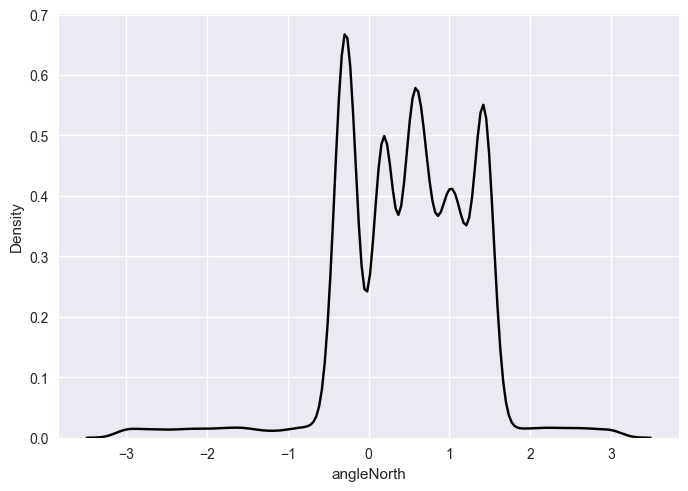

In [15]:
kde = sns.kdeplot(data=df_p, x=df_p['angleNorth'], color=color2)

<Axes: xlabel='dbsignal', ylabel='dbsignal'>

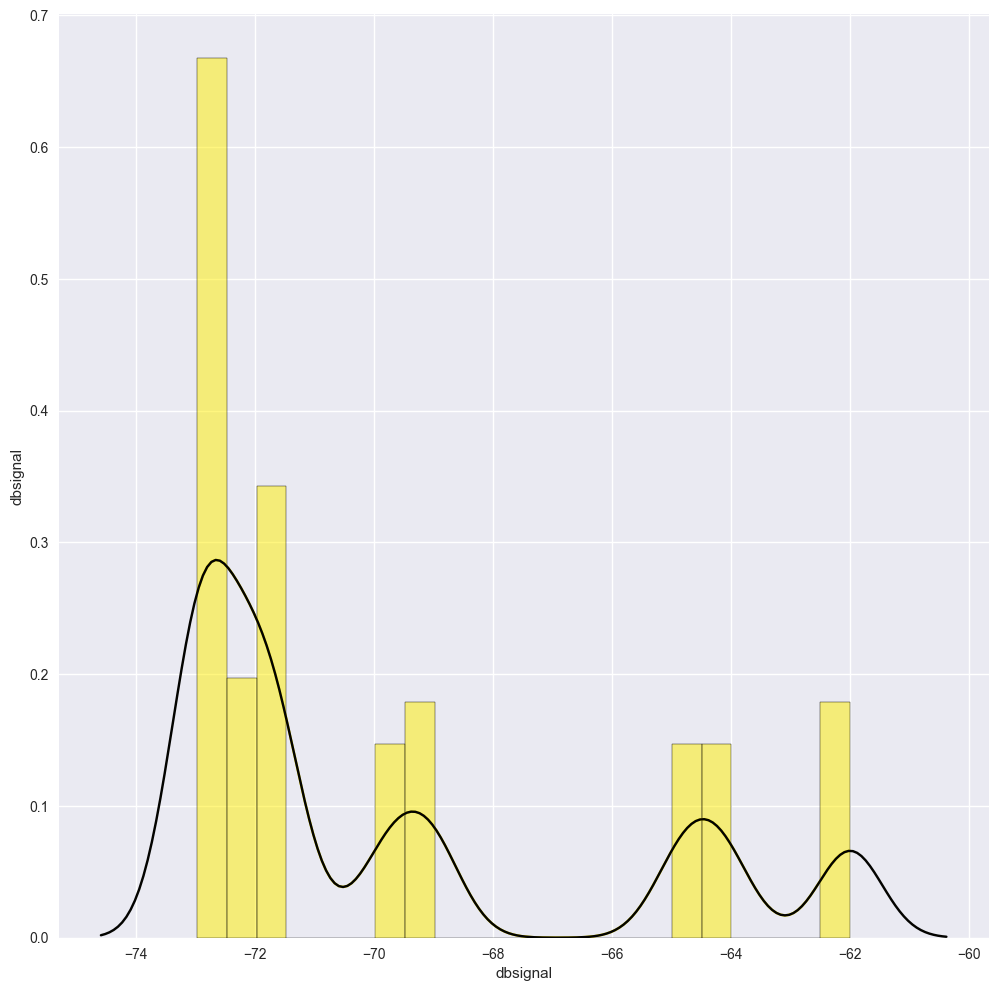

In [16]:
hist_plot_specific(data=df_p, column='dbsignal', binwidth=0.5)

<Axes: xlabel='angleNorth', ylabel='angleNorth'>

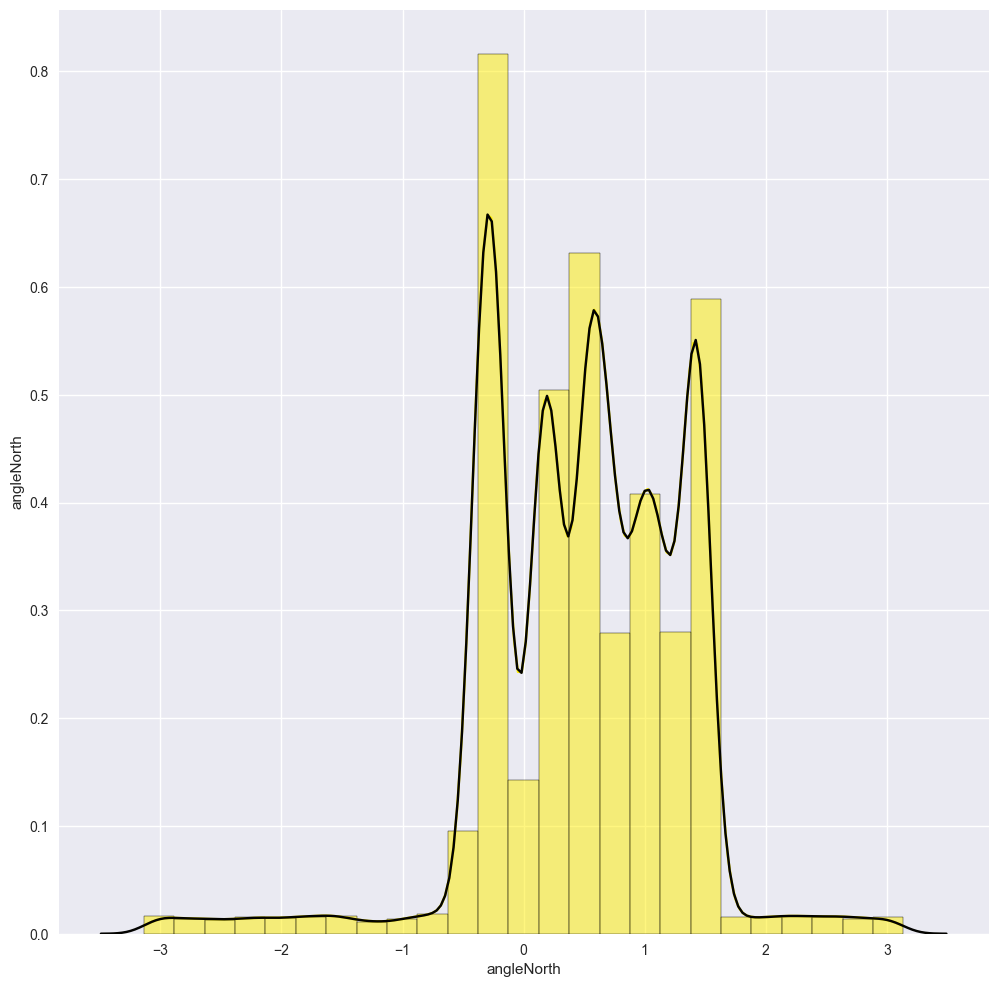

In [17]:
hist_plot_specific(data=df_p, column='angleNorth', binwidth=0.25)

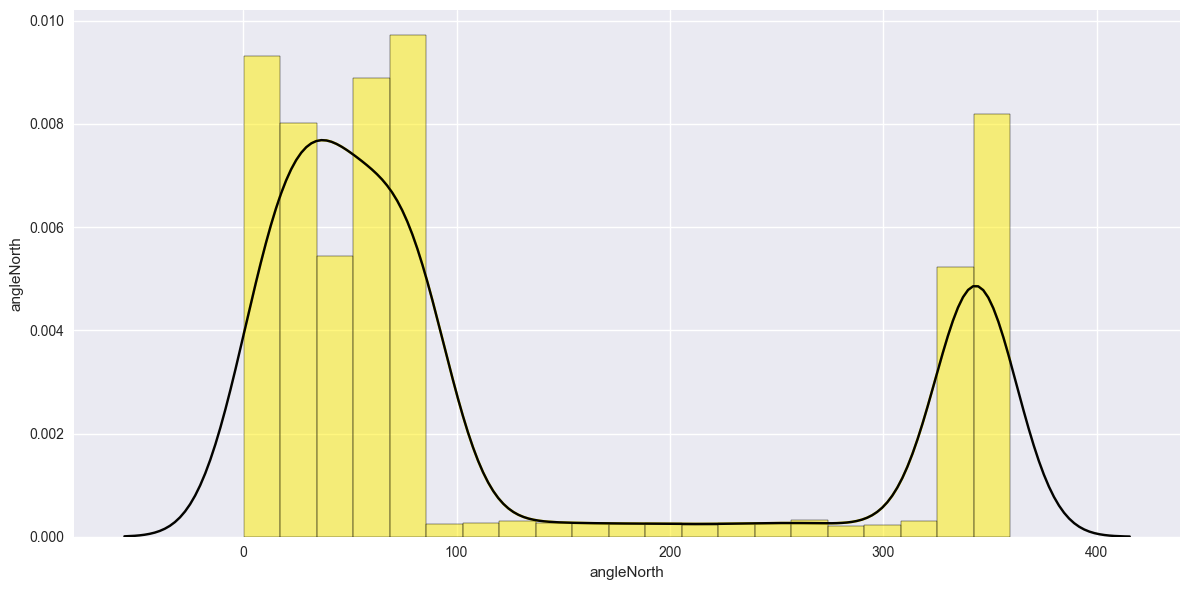

[<Axes: xlabel='angleNorth', ylabel='angleNorth'>]

In [18]:
hist_plot(data=df, columns=['angleNorth'])

[<Axes: xlabel='angleNorth', ylabel='angleNorth'>]

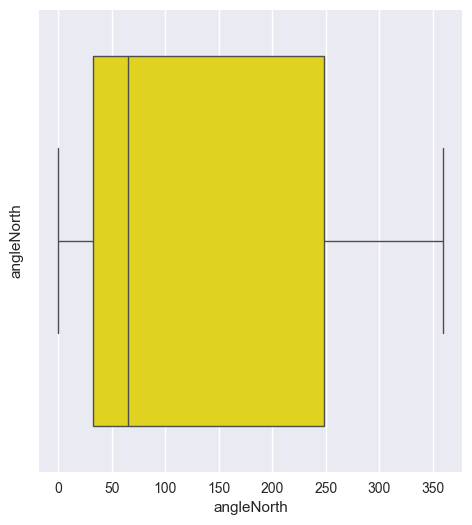

In [19]:
box_plot(data=df, columns=['angleNorth'])

[<Axes: xlabel='angleNorth', ylabel='angleNorth'>]

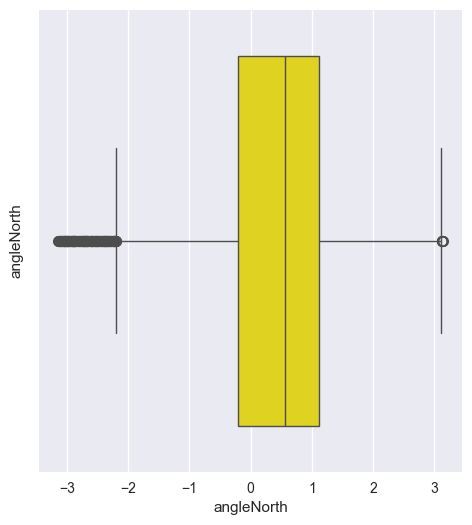

In [20]:
box_plot(data=df_p, columns=['angleNorth'])

In [21]:
percentage, total = atipic_data(data=df, column='angleNorth')
print(percentage)
print(total)

percentage, total = atipic_data(data=df_p, column='angleNorth')
print(percentage)
print(total)

df['wrong'].value_counts()

0.0
0
0.013722886232846392
217


wrong
False    14307
True      1506
Name: count, dtype: int64

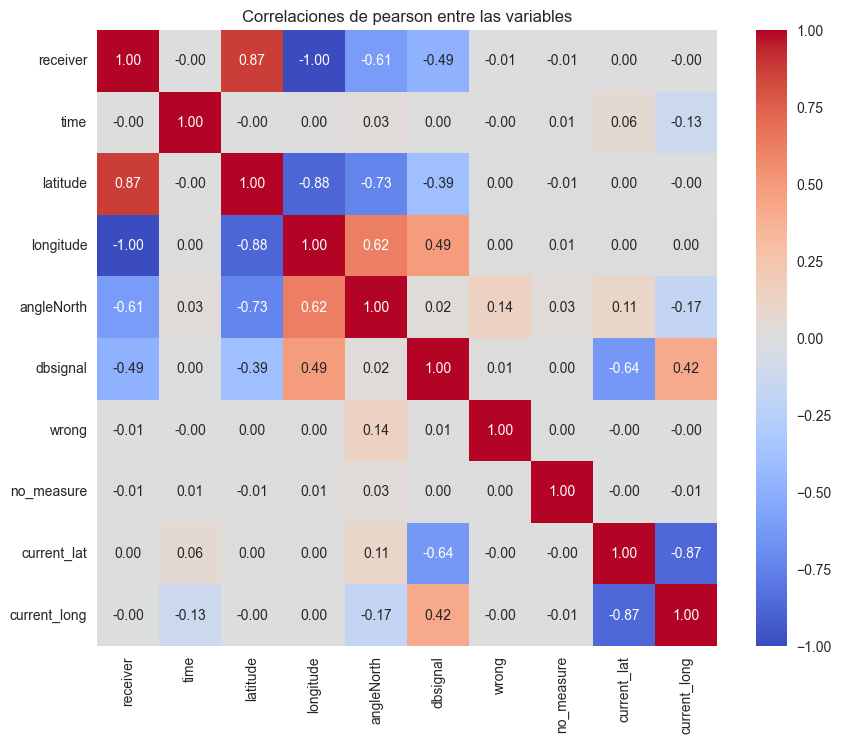

True

In [22]:
df_correlations(data=df, method='pearson')

In [23]:
class point:
    def __init__(self, lon, lat):
        self.lon = lon
        self.lat = lat

    def __str__(self):
        return f"longitude: {self.lon}, latitude: {self.lat}"
    

class line:
    def __init__(self, point, angle):
        self.angle = angle
        self.m = math.tan(angle)
        self.p = point


    def intersec_cartesian(self, other):
        # La ecuacion de la recta es y = mx + b
        # Para calcular b hay que despejar y sustituir uno de los puntos de la recta
        b1 = self.p.lat - (self.m - self.p.lon)
        b2 = other.p.lat - (other.m - other.p.lon)
        ptoX = (b2 - b1) / (self.m - other.m)
        ptoY = self.m * ptoX + b1
        # Otra forma de realizar el calculo
        # ptoX = (b1 - b2) / (other.m - self.m)
        # ptoY = (other.m * b1 - self.m * b2) / (other.m - self.m)
        return point(ptoX, ptoY)
    

    #def intersec_geodesic(self, other):
    #    lat = 
    

    def __str__(self):
        return f"Line with point in ({self.p.lon}, {self.p.lat}) with a gradient of {self.m}. The angle reference is {self.angle}"
    


In [24]:
test = point(df_p['longitude'][0], df_p['latitude'][0])
print(test)

line1 = line(test, df_p['angleNorth'][0])
print(df_p['angleNorth'][0])
print(90 + df_p['angleNorth'][0] * 180 / math.pi)
print(1.6201891799832917 * 180 / math.pi)
print(line1)

line2 = line(point(df_p['longitude'][1], df_p['latitude'][1]), df_p['angleNorth'][1])

signal = line2.intersec_cartesian(line1)

print(signal.lat)


longitude: 0.7601086262883093, latitude: 40.74674867699393
0.9938549490164935
146.9436940268347
92.83000202580433
Line with point in (0.7601086262883093, 40.74674867699393) with a gradient of 1.5365570229137624. The angle reference is 0.9938549490164935
41.61092631802638
